INFO: This notebook is used for generating masks for the images with face-down puzzle pieces. It also provides methods for resizing images, cropping them tight around the pieces, adding padding and generating images with only the contour of the pieces. It was created for Google Colab.

### INSTALL&IMPORT

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow 

### MASK GENERATION

In [ ]:
# EXAMPLE
img = cv2.imread('/content/zana_3.JPG',2)
ret, img = cv2.threshold(img, 140, 255, cv2.THRESH_BINARY)

img_copy = img.copy()
cv2.floodFill(image=img_copy, mask=None, seedPoint=(0, 0), newVal=255)
img_copy = cv2.bitwise_not(img_copy)
final_img = cv2.bitwise_or(img, img_copy)

cv2.imwrite('/content/' + 'test' + '.png',final_img)

In [ ]:
path_images = '/content/gdrive/MyDrive/puzzle_pieces/zana'
list_of_images = os.listdir(path_images)

for img_name in list_of_images:
  img_name = img_name[:-4]
  img = cv2.imread(path_images+'/'+img_name+'.JPG', 2)

  # img = cv2.imread('/content/snow_1.JPG',2)
  # TRANSFORM TO BINARY
  ret, img = cv2.threshold(img, 140, 255, cv2.THRESH_BINARY)

  # APPLY EROSION (if necessary)
  # kernel = np.ones((5, 5), np.uint8)
  # img = cv2.erode(img, kernel) 

  # FILL GAPS - poate crea imagini complet albe!!!
  img_copy = img.copy()
  cv2.floodFill(image=img_copy, mask=None, seedPoint=(0, 0), newVal=255)
  img_copy = cv2.bitwise_not(img_copy)
  final_img = cv2.bitwise_or(img, img_copy)
  # final_img = cv2.resize(final_img, (256, 256))

  cv2.imwrite('/content/gdrive/MyDrive/puzzle_pieces/zana_masks_1/' + img_name + '.png',final_img)
  # cv2.imwrite('/content/' + img_name + '.png',final_img)

### RESIZE

(3024, 3024)
Resized Dimensions :  (500, 500)


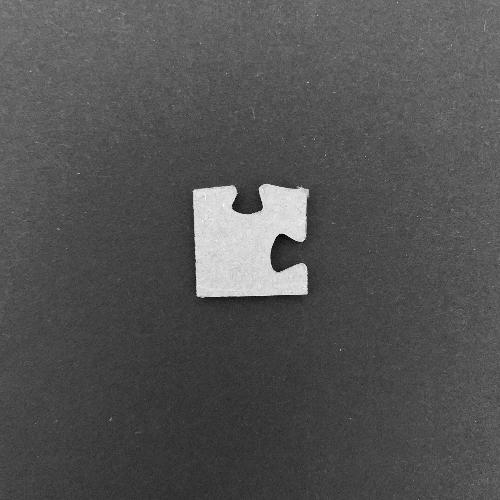

In [ ]:
# EXAMPLE
img = cv2.imread('/content/snow_1.JPG',2)
print(img.shape)

resized = cv2.resize(img, (500, 500)) # 256 sau 512 ar merge pt u-net
print('Resized Dimensions : ',resized.shape)
 
cv2_imshow(resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# RESIZE ORIGINAL IMAGES TO 256x256

path_images = '/content/gdrive/MyDrive/puzzle_pieces/zana'
list_of_images = os.listdir(path_images)

for img_name in list_of_images:
  img_name = img_name[:-4]
  img = cv2.imread(path_images+'/'+img_name+'.JPG', 2)

  resized = cv2.resize(img, (256, 256))

  cv2.imwrite('/content/gdrive/MyDrive/puzzle_pieces/zana_256/' + img_name + '.png',resized)

### CROP IMAGES TIGHT AROUND THE PIECES

(256, 256)
97 129
138 74
140 173
165 152
Cropped Dimensions :  (78, 109)


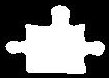

In [ ]:
# EXAMPLE
img = cv2.imread('/content/vincent_2.JPG',2)
print(img.shape)

cropped = img.copy()
top_x, top_y = 0, 0
bottom_x, bottom_y = 0, 0
left_x, left_y = 0, 0
right_x, right_y = 0, 0
for i in range(len(img)):
  for j in range(len(img[i])):
    if cropped[i][j] == 255 and (cropped[i+1][j] == 255 or cropped[i][j+1] == 255):
      top_x, top_y = i, j
      break
  if top_x!=0 and top_y!=0:
    break

for i in range(len(img)-1,0,-1):
  for j in range(len(img[i])-1,0,-1):
    if cropped[i][j] == 255 and (cropped[i-1][j] == 255 or cropped[i][j-1] == 255):
      bottom_x, bottom_y = i, j
      break
  if bottom_x!=0 and bottom_y!=0:
    break

for i in range(len(img)):
  for j in range(len(img[i])):
    if cropped[j][i] == 255 and (cropped[j+1][i] == 255 or cropped[j][i+1] == 255):
      left_x, left_y = j, i
      break
  if left_x!=0 and left_y!=0:
    break

for i in range(len(img)-1,0,-1):
  for j in range(len(img[i])):
    if cropped[j][i] == 255 and (cropped[j-1][i] == 255 or cropped[j][i-1] == 255):
      right_x, right_y = j, i
      break
  if right_x!=0 and right_y!=0:
    break


print(top_x, top_y)
print(left_x, left_y)
print(right_x, right_y)
print(bottom_x, bottom_y)

cropped = cropped[top_x-5:bottom_x+5, left_y-5:right_y+5]
print('Cropped Dimensions : ',cropped.shape)
 
cv2_imshow(cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# CROP IMAGES AROUND THE SIGN + 5 pixels ON EACH SIDE

path_images = '/content/gdrive/MyDrive/puzzle_pieces/zana_masks_1'
list_of_images = os.listdir(path_images)

for img_name in list_of_images:
  img = cv2.imread(path_images+'/'+img_name, 2)

  cropped = img.copy()
  top_x, top_y = 0, 0
  bottom_x, bottom_y = 0, 0
  left_x, left_y = 0, 0
  right_x, right_y = 0, 0
  for i in range(len(img)):
    for j in range(len(img[i])):
      if cropped[i][j] == 255:
        if (i+1<len(img) and cropped[i+1][j] == 255) or (j+1<len(img) and cropped[i][j+1] == 255):
          top_x, top_y = i, j
          break
    if top_x!=0 and top_y!=0:
      break

  for i in range(len(img)-1,0,-1):
    for j in range(len(img[i])-1,0,-1):
      if cropped[i][j] == 255 and (cropped[i-1][j] == 255 or cropped[i][j-1] == 255):
        bottom_x, bottom_y = i, j
        break
    if bottom_x!=0 and bottom_y!=0:
      break

  for i in range(len(img)):
    for j in range(len(img[i])):
      if cropped[j][i] == 255 and (cropped[j+1][i] == 255 or cropped[j][i+1] == 255):
        left_x, left_y = j, i
        break
    if left_x!=0 and left_y!=0:
      break

  for i in range(len(img)-1,0,-1):
    for j in range(len(img[i])):
      if cropped[j][i] == 255 and (cropped[j-1][i] == 255 or cropped[j][i-1] == 255):
        right_x, right_y = j, i
        break
    if right_x!=0 and right_y!=0:
      break

  cropped = cropped[top_x-5:bottom_x+5, left_y-5:right_y+5]
  print(img_name)
  cv2.imwrite('/content/gdrive/MyDrive/puzzle_pieces/zana_masks_2/' + img_name, cropped)

In [ ]:
# Retrieve the maximum dimension of an image
path_images = '/content/gdrive/MyDrive/puzzle_pieces/zana_masks_2'
list_of_images = os.listdir(path_images)

x=[]
y=[]
for img_name in list_of_images:
  img = cv2.imread(path_images+'/'+img_name, 2)
  x.append(img.shape[0])
  y.append(img.shape[1])

print(max(x), max(y))

142 133


In [ ]:
# ADD PADDING TO CROPPED IMG - RESHAPE TO (148,148)
from PIL import Image

path_images = '/content/gdrive/MyDrive/puzzle_pieces/zana_masks_2'
list_of_images = os.listdir(path_images)

def padding_image(image, padding_values, padding_color):
    top, bottom, left, right = padding_values
    width, height = image.size
    width2, height2 = width + left + right, height + top + bottom
    
    padded_image = Image.new(mode="RGB", size=(width2, height2), color=padding_color)
    padded_image.paste(image, box=(left, top))
    return padded_image

new_dim = 148
for img_name in list_of_images:
  img = Image.open(path_images+'/'+img_name)
  
  diff_w1 = new_dim-img.size[0]
  diff_h1 = new_dim-img.size[1]
  if diff_w1%2==1:
    diff_w1 = (new_dim-img.size[0])//2
    diff_w2 = (new_dim-img.size[0])//2+1
  else:
    diff_w1 = (new_dim-img.size[0])//2
    diff_w2 = (new_dim-img.size[0])//2
  if diff_h1%2==1:
    diff_h1 = (new_dim-img.size[1])//2
    diff_h2 = (new_dim-img.size[1])//2+1
  else:
    diff_h1 = (new_dim-img.size[1])//2
    diff_h2 = (new_dim-img.size[1])//2

  padded = padding_image(img, (diff_h1,diff_h2,diff_w1,diff_w2), (0,0,0))
  padded.save('/content/gdrive/MyDrive/puzzle_pieces/zana_masks_2/' + img_name)

### KEEP ONLY THE EDGE 

(148, 148)
Resized Dimensions :  (135, 135)


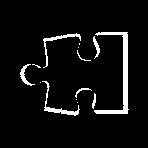

In [ ]:
# EXAMPLE
from PIL import Image, ImageChops

img = Image.open('/content/zana_96.png').convert("1")
print(img.size)

transformed = img.resize((135, 135))
print('Resized Dimensions : ',transformed.size)

def padding_image(image, padding_values, padding_color):
    top, bottom, left, right = padding_values
    width, height = image.size
    width2, height2 = width + left + right, height + top + bottom
    
    padded_image = Image.new(mode="RGB", size=(width2, height2), color=padding_color)
    padded_image.paste(image, box=(left, top))
    return padded_image


diff_w1 = 148-transformed.size[0]
diff_h1 = 148-transformed.size[1]
if diff_w1%2==1:
  diff_w1 = (148-transformed.size[0])//2
  diff_w2 = (148-transformed.size[0])//2+1
else:
  diff_w1 = (148-transformed.size[0])//2
  diff_w2 = (148-transformed.size[0])//2
if diff_h1%2==1:
  diff_h1 = (148-transformed.size[1])//2
  diff_h2 = (148-transformed.size[1])//2+1
else:
  diff_h1 = (148-transformed.size[1])//2
  diff_h2 = (148-transformed.size[1])//2

padded = padding_image(transformed, (diff_h1,diff_h2,diff_w1,diff_w2), (0,0,0))
padded = padded.convert("1")
im3 = ImageChops.logical_xor(img, padded)

im3.show()

In [ ]:
from PIL import Image, ImageChops

path_images = '/content/gdrive/MyDrive/puzzle_pieces/zana_masks'
list_of_images = os.listdir(path_images)

def padding_image(image, padding_values, padding_color):
    top, bottom, left, right = padding_values
    width, height = image.size
    width2, height2 = width + left + right, height + top + bottom
    
    padded_image = Image.new(mode="RGB", size=(width2, height2), color=padding_color)
    padded_image.paste(image, box=(left, top))
    return padded_image


for img_name in list_of_images:
  img = Image.open(path_images+'/'+img_name).convert("1")
  transformed = img.resize((135, 135))

  diff_w1 = 148-transformed.size[0]
  diff_h1 = 148-transformed.size[1]
  if diff_w1%2==1:
    diff_w1 = (148-transformed.size[0])//2
    diff_w2 = (148-transformed.size[0])//2+1
  else:
    diff_w1 = (148-transformed.size[0])//2
    diff_w2 = (148-transformed.size[0])//2
  if diff_h1%2==1:
    diff_h1 = (148-transformed.size[1])//2
    diff_h2 = (148-transformed.size[1])//2+1
  else:
    diff_h1 = (148-transformed.size[1])//2
    diff_h2 = (148-transformed.size[1])//2

  padded = padding_image(transformed, (diff_h1,diff_h2,diff_w1,diff_w2), (0,0,0))
  padded = padded.convert("1")
  im3 = ImageChops.logical_xor(img, padded)
  im3.save('/content/gdrive/MyDrive/puzzle_pieces/zana_only_edge/' + img_name)